In [1]:
try:
    %load_ext autoreload
    %autoreload 2
except:
        pass
%matplotlib inline
import functions.add_path

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')

import av # import to import before any pupillabs libraries

/net/store/nbp/projects/IntoTheWild/ET_Analysis/etcomp/code


In [2]:
import ctypes
ctypes.cdll.LoadLibrary('/net/store/nbp/projects/IntoTheWild/ET_Analysis/etcomp/local/build/build_ceres/lib/libceres.so.2')

<CDLL '/net/store/nbp/projects/IntoTheWild/ET_Analysis/etcomp/local/build/build_ceres/lib/libceres.so.2', handle 331e880 at 0x7fa83c6830f0>

In [3]:
import pupil_detectors

In [4]:
import cv2
cv2.__version__

'3.4.3'

In [5]:
from functions.pl_surface import fake_gpool_surface

reached exception:pyaudio
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration


Loading dummy calibration


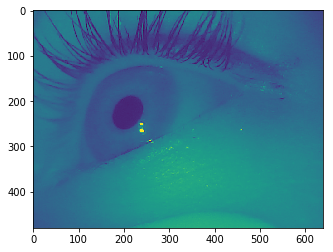

In [7]:
import pl_anna_tools

cap = pl_anna_tools.init_playback(video_name = 'eye1.mp4',video_file_path = '/net/store/nbp/projects/IntoTheWild/Daten/Eyetracking/Wild/VP21/2018_05_24/001')

cap.seek_to_frame(1000)

frame= cap.get_frame()

plt.imshow(frame.gray)

In [8]:
detector = pupil_detectors.detector_2d.Detector_2D(settings={'pupil_size_min':10,'pupil_size_max':160})



In [9]:
def nbp_pupildetect(eye_id = None,folder=None,options = None,detector_type='2D',framerange=None):
    #options = {"pupil_size_min":10,'pupil_size_max':150}
    
    import av
    import pl_anna_tools
    from ui_roi import UIRoi
    
    cap = pl_anna_tools.init_playback(video_name = 'eye%i.mp4'%(eye_id),video_file_path = folder)

    # Defaults taken from detector_2d. Somehow we cannot change the properties after the init. Maybe this is due to the Cpython compilation?!
    detectProperties = {}
    detectProperties["coarse_detection"] = True
    detectProperties["coarse_filter_min"] = 128
    detectProperties["coarse_filter_max"] = 280
    detectProperties["intensity_range"] = 23
    detectProperties["blur_size"] = 5
    detectProperties["canny_treshold"] = 160
    detectProperties["canny_ration"] = 2
    detectProperties["canny_aperture"] = 5
    detectProperties["pupil_size_max"] = 150
    detectProperties["pupil_size_min"] = 10
    detectProperties["strong_perimeter_ratio_range_min"] = 0.6
    detectProperties["strong_perimeter_ratio_range_max"] = 1.1
    detectProperties["strong_area_ratio_range_min"] = 0.8
    detectProperties["strong_area_ratio_range_max"] = 1.1
    detectProperties["contour_size_min"] = 5
    detectProperties["ellipse_roundness_ratio"] = 0.09
    detectProperties["initial_ellipse_fit_treshhold"] = 4.3
    detectProperties["final_perimeter_ratio_range_min"] = 0.5
    detectProperties["final_perimeter_ratio_range_max"] = 1.0
    detectProperties["ellipse_true_support_min_dist"] = 3.0
    if options:
   
        for key in options.keys():
            detectProperties[key] = options[key]
    #result = detector.detect(frame, UIRoi([frame.height,frame.width]), 0)
    if detector_type == '2D':
        detector = pupil_detectors.detector_2d.Detector_2D(settings=detectProperties)
    elif detector_type == '3D':
        detector = pupil_detectors.detector_3d.Detector_3D()
    else:
        raise('unknown detectortype')
        
    

    if not framerange:
        framerange = range(cap.get_frame_count())
    results = [];
    for k in framerange:
        cap.seek_to_frame(k)
        frame = cap.get_frame()
        result = detector.detect(frame, UIRoi([frame.height,frame.width]), 0)
        if result is not None:
            result['id'] = eye_id
        results.append(result)
    return(results)

In [21]:
pupil_positions = nbp_pupildetect(detector_type = '2D',eye_id = 0,
                                  folder='/net/store/nbp/projects/IntoTheWild/Daten/Eyetracking/Wild/VP21/2018_05_24/001',
                                  framerange=range(100),
                                  options={'pupil_size_min':10,'pupil_size_max':150})

Loading dummy calibration


list

In [10]:
import csv
import numpy as np
import pandas as pd

myfile = '/net/store/nbp/users/yschwarze/nbp_intothewild/Analysis/Eyetracking/path.csv'

csvfile = open(myfile, 'r')

paths = pd.read_csv(myfile,sep=",",header=None,skiprows=[5]) # To read 1st,2nd and 4th columns
paths = paths.fillna('')

In [12]:
from lib.pupil.pupil_src.shared_modules import file_methods as pl_file_methods
counter=0
for index, i in paths.iterrows():
    for index2, k in i.iteritems():
        folder_pos=k 
        name=os.path.join(folder_pos, 'pldata')
        print(folder_pos)
        if k == '':
            break
        pupil_positions0 = nbp_pupildetect(detector_type = '2D',eye_id = 0,
                                  folder=folder_pos,
                                  framerange=range(100),
                                  options={'pupil_size_min':20,'pupil_size_max':200})
        pupil_positions1 = nbp_pupildetect(detector_type = '2D',eye_id = 1,
                                  folder=folder_pos,
                                  framerange=range(100),
                                  options={'pupil_size_min':20,'pupil_size_max':200})  
        
        rc = []
        for i, j in zip(pupil_positions1, pupil_positions0):
            rc.append(i)
            rc.append(j)
        #print(rc)
        
    
        #csvfile = os.path.join(folder_pos, 'pldata.csv')
        #my_df = pd.DataFrame(pupil_positions)
        #my_df=my_df[['diameter','confidence']]
        #df_new=my_df.loc[my_df['confidence'] <0.8]
        #my_df.to_csv(csvfile, index=False, header=True)
        pl_file_methods.save_object(pupil_positions,name)
        pl_file_methods.save_object(rc,name)

Loading dummy calibration


/net/store/nbp/projects/IntoTheWild/Daten/Eyetracking/Wild/VP21/2018_05_24/001


Loading dummy calibration


[{'diameter': 81.1799545288086, 'ellipse': {'center': (194.06204223632812, 227.7498016357422), 'angle': 32.39804458618164, 'axes': (61.93416213989258, 81.1799545288086)}, 'confidence': 0.99, 'topic': 'pupil', 'timestamp': 1364.89108, 'id': 1, 'method': '2d c++', 'norm_pos': (0.3032219409942627, 0.5255212465922038)}, {'diameter': 81.2695083618164, 'ellipse': {'center': (244.0111083984375, 303.50096893310547), 'angle': 101.00467681884768, 'axes': (37.30189895629883, 81.2695083618164)}, 'confidence': 0.552224719700437, 'topic': 'pupil', 'timestamp': 1364.888598, 'id': 0, 'method': '2d c++', 'norm_pos': (0.3812673568725586, 0.367706314722697)}, {'diameter': 91.58788299560547, 'ellipse': {'center': (228.38287353515625, 69.2944107055664), 'angle': 65.44581604003903, 'axes': (65.85073852539062, 91.58788299560547)}, 'confidence': 0.5176862555239888, 'topic': 'pupil', 'timestamp': 1364.90788, 'id': 1, 'method': '2d c++', 'norm_pos': (0.35684823989868164, 0.8556366443634034)}, {'diameter': 74.74

NameError: name 'pupil_positions' is not defined

In [56]:
pupil_positions = nbp_pupildetect(detector_type = '2D',eye_id = 0,
                                  folder='/net/store/nbp/projects/IntoTheWild/Daten/Eyetracking/Wild/VP21/2018_05_24/001',
                                  framerange=range(100),
                                  options={'pupil_size_min':10,'pupil_size_max':160})

Loading dummy calibration


In [226]:
#pupil_positions